# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
----

## Observations and Insights
- There is a strong correlation between latitude and temperatures in both hemispheres with an r-squared value of -0.8627048545571769 in the northern hemisphere and an r-squared: 0.5481163661256727 in the southern hemishere.
- The maximum temperature for a city in the database is 107F and the lowest is -31F.
- The maximum wind speed for a city in the database is 52mph and the lowest is 0.36mph.
----

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

654

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Empty lists to append data and use for dataframe
city_list = []
temps = []
humidity = []
clouds = []
winds = []
lats = []
lngs = []
countries = []
date = []

# Set url and units
units = 'imperial'
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q='
# Find the main keys of the API
test_response = requests.get(base_url + 'lima').json()
test_response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [4]:
# Set counters
counter = 0
set_counter = 1

for city in cities:
    try:
        response = requests.get(base_url + city.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        date.append(response['dt'])
        if counter > 48:
            counter = 1
            set_counter += 1
            city_list.append(city)
        else:
            counter += 1
            city_list.append(city)
        print(f"Processing Record # : {counter} of Set {set_counter} | {city}")
    except:
        print("City not found. Skipping request...")
print("------------------------------\nData API Response Complete\n------------------------------")

Processing Record # : 1 of Set 1 | kavieng
Processing Record # : 2 of Set 1 | aksu
Processing Record # : 3 of Set 1 | bluff
Processing Record # : 4 of Set 1 | ponta delgada
Processing Record # : 5 of Set 1 | jamestown
Processing Record # : 6 of Set 1 | vostok
Processing Record # : 7 of Set 1 | puerto ayora
Processing Record # : 8 of Set 1 | mount gambier
Processing Record # : 9 of Set 1 | bengkulu
City not found. Skipping request...
Processing Record # : 10 of Set 1 | provideniya
City not found. Skipping request...
Processing Record # : 11 of Set 1 | mgandu
Processing Record # : 12 of Set 1 | namibe
Processing Record # : 13 of Set 1 | dickinson
Processing Record # : 14 of Set 1 | komsomolskiy
City not found. Skipping request...
Processing Record # : 15 of Set 1 | njombe
Processing Record # : 16 of Set 1 | bitung
Processing Record # : 17 of Set 1 | marawi
Processing Record # : 18 of Set 1 | mataura
Processing Record # : 19 of Set 1 | ancud
Processing Record # : 20 of Set 1 | rikitea
Pro

Processing Record # : 17 of Set 4 | grindavik
Processing Record # : 18 of Set 4 | halifax
Processing Record # : 19 of Set 4 | colatina
Processing Record # : 20 of Set 4 | longyearbyen
Processing Record # : 21 of Set 4 | chuy
Processing Record # : 22 of Set 4 | glenwood springs
Processing Record # : 23 of Set 4 | arlit
Processing Record # : 24 of Set 4 | goderich
Processing Record # : 25 of Set 4 | amudat
Processing Record # : 26 of Set 4 | katsuura
City not found. Skipping request...
Processing Record # : 27 of Set 4 | coquimbo
Processing Record # : 28 of Set 4 | nemuro
Processing Record # : 29 of Set 4 | lompoc
Processing Record # : 30 of Set 4 | vincennes
Processing Record # : 31 of Set 4 | poum
Processing Record # : 32 of Set 4 | rorvik
City not found. Skipping request...
City not found. Skipping request...
Processing Record # : 33 of Set 4 | scottsbluff
Processing Record # : 34 of Set 4 | rawson
Processing Record # : 35 of Set 4 | horsham
Processing Record # : 36 of Set 4 | inongo


Processing Record # : 41 of Set 7 | lagoa
Processing Record # : 42 of Set 7 | ust-ishim
City not found. Skipping request...
Processing Record # : 43 of Set 7 | charyshskoye
Processing Record # : 44 of Set 7 | jalu
Processing Record # : 45 of Set 7 | kavaratti
Processing Record # : 46 of Set 7 | araouane
City not found. Skipping request...
Processing Record # : 47 of Set 7 | mareeba
Processing Record # : 48 of Set 7 | zhigansk
Processing Record # : 49 of Set 7 | osakarovka
Processing Record # : 1 of Set 8 | hasaki
Processing Record # : 2 of Set 8 | chiredzi
Processing Record # : 3 of Set 8 | zheleznodorozhnyy
City not found. Skipping request...
Processing Record # : 4 of Set 8 | port hardy
Processing Record # : 5 of Set 8 | trebinje
Processing Record # : 6 of Set 8 | upernavik
Processing Record # : 7 of Set 8 | taozhuang
Processing Record # : 8 of Set 8 | harper
Processing Record # : 9 of Set 8 | merauke
Processing Record # : 10 of Set 8 | corner brook
Processing Record # : 11 of Set 8 

Processing Record # : 3 of Set 11 | dongsheng
Processing Record # : 4 of Set 11 | kattivakkam
Processing Record # : 5 of Set 11 | prince rupert
Processing Record # : 6 of Set 11 | nelson bay
Processing Record # : 7 of Set 11 | san andres
Processing Record # : 8 of Set 11 | krasnoturinsk
Processing Record # : 9 of Set 11 | dangriga
Processing Record # : 10 of Set 11 | berbera
Processing Record # : 11 of Set 11 | barraute
Processing Record # : 12 of Set 11 | esna
Processing Record # : 13 of Set 11 | yerkoy
Processing Record # : 14 of Set 11 | ringebu
Processing Record # : 15 of Set 11 | dali
Processing Record # : 16 of Set 11 | umea
Processing Record # : 17 of Set 11 | mahanje
Processing Record # : 18 of Set 11 | botou
Processing Record # : 19 of Set 11 | byron bay
Processing Record # : 20 of Set 11 | joshimath
Processing Record # : 21 of Set 11 | dzaoudzi
Processing Record # : 22 of Set 11 | taganak
Processing Record # : 23 of Set 11 | lewistown
Processing Record # : 24 of Set 11 | paci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_list,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":temps,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":winds,
    "Country":countries,
    "Date":date,
}

weather_df = pd.DataFrame(weather_dict)
# Making sure there are no errors in the dataframe
weather_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [67]:
# Save to csv
weather_df.to_csv('../Resources/weather.csv',encoding = 'utf-8',index = False)

# Display dataframe
weather_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        kavieng  -2.5744  150.7967     81.16        76          71   
1           aksu  41.1231   80.2644     58.01        28         100   
2          bluff -46.6000  168.3333     51.01        92          89   
3  ponta delgada  38.7333  -28.2667     62.60        88          40   
4      jamestown  42.0970  -79.2353     28.99        35           1   

   Wind Speed Country        Date  
0        7.49      PG  1615823932  
1       14.79      CN  1615823932  
2        7.00      NZ  1615823932  
3        9.22      PT  1615823933  
4       10.31      US  1615823933

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
weather_df.describe()
# No city has humidity over 100%

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean    23.115967   20.946098   55.828082   67.796233   51.366438    8.396113   
std     31.274205   84.862614   28.416430   23.388315   38.587353    6.147955   
min    -54.800000 -179.166700  -31.200000    4.000000    0.000000    0.360000   
25%     -1.968150  -47.663625   35.600000   54.000000    8.000000    4.000000   
50%     28.059500   24.730700   62.600000   74.000000   54.000000    7.000000   
75%     48.995175   86.606000   78.800000   86.000000   90.000000   11.192500   
max     78.218600  179.316700  107.200000  100.000000  100.000000   52.930000   

               Date  
count  5.840000e+02  
mean   1.615824e+09  
std    7.780208e+01  
min    1.615823e+09  
25%    1.615824e+09  
50%    1.615824e+09  
75%    1.615824e+09  
max    1.615824e+09

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

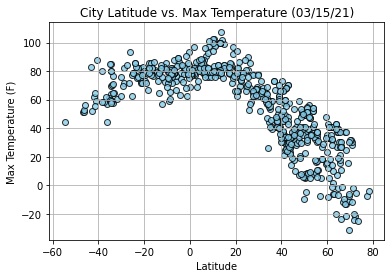

In [26]:
plt.scatter(weather_df["Lat"], 
            weather_df["Max Temp"],
            edgecolor="black",facecolors="skyblue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Temperature.png")

***This scatter plot shows how the max temperature is affected as we move closer or farther away from the Equator. We can see that temperatures rise as we get closer to the Equator (0Â° latitude).***

## Latitude vs. Humidity Plot

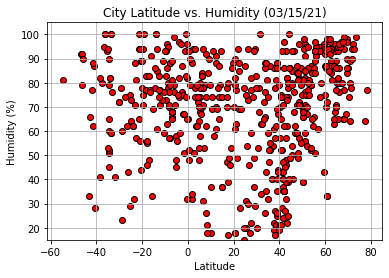

In [34]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],
            edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (True)
plt.savefig("../Images/Latitude_Humidity.png")
plt.show()

***This scatter plot shows how the humidity is affected as we move closer or farther away from the Equator. It looks like the humidity levels are not clearly different near the Equator.***

## Latitude vs. Cloudiness Plot

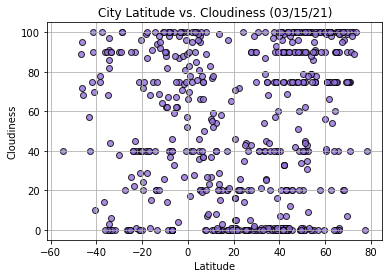

In [36]:
plt.scatter(weather_df["Lat"], 
            weather_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = 'mediumpurple')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Cloudiness.png")

***This scatter plot shows how the cloudiness is affected as we move closer or farther away from the Equator. It doesn't show a clear relationship between cloudiness and the location along the Equator.***

## Latitude vs. Wind Speed Plot

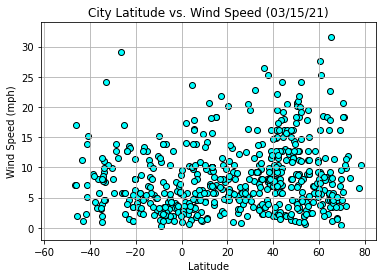

In [38]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],
            edgecolors="black",facecolors="aqua")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (True)
plt.savefig("../Images/Latitude_WindSpeed.png")
plt.show()

***This scatter plot shows how the wind speed is affected as we move closer or farther away from the Equator. There is no clear relationship between the two.***

## Linear Regression

In [45]:
# Create a northern and southern dataframe
northern_df = weather_df.loc[weather_df['Lat'] > 0]
southern_df = weather_df.loc[weather_df['Lat'] < 0]

In [47]:
northern_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
1           aksu  41.1231   80.2644     58.01        28         100   
3  ponta delgada  38.7333  -28.2667     62.60        88          40   
4      jamestown  42.0970  -79.2353     28.99        35           1   
5         vostok  46.4856  135.8833     28.15        76         100   
6   puerto ayora  36.5939   -6.2330     73.40        40           0   

   Wind Speed Country        Date  
1       14.79      CN  1615823932  
3        9.22      PT  1615823933  
4       10.31      US  1615823933  
5        3.51      RU  1615823933  
6        3.44      ES  1615823933

In [43]:
southern_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0    kavieng  -2.5744  150.7967     81.16        76          71        7.49   
2      bluff -46.6000  168.3333     51.01        92          89        7.00   
8   bengkulu  -3.8004  102.2655     78.40        82          87        3.62   
10    mgandu  -5.9500   34.1333     67.08        79          33        4.32   
11    namibe -15.1961   12.1522     80.60        69          75       12.66   

   Country        Date  
0       PG  1615823932  
2       NZ  1615823932  
8       ID  1615823934  
10      TZ  1615823935  
11      AO  1615823935

In [58]:
# Define function for linear regression
def line_regress(x,y,yaxis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    # Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.28x + 97.9
r-squared: -0.8627048545571769


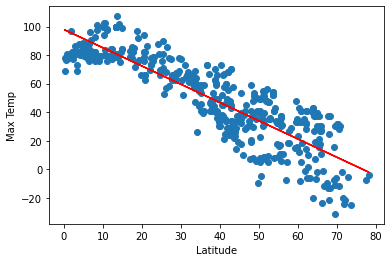

<Figure size 432x288 with 0 Axes>

In [59]:
x = northern_df['Lat']
y = northern_df['Max Temp']
line_regress(x,y,'Max Temp')
plt.savefig("../Images/NH_temp_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.42x + 82.44
r-squared: 0.5481163661256727


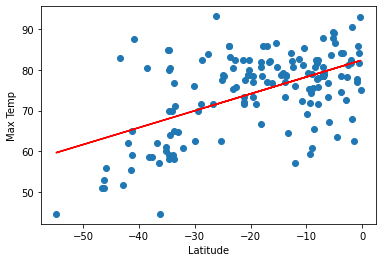

<Figure size 432x288 with 0 Axes>

In [60]:
x = southern_df['Lat']
y = southern_df['Max Temp']
line_regress(x,y,'Max Temp')
plt.savefig("../Images/SH_temp_vs_lat.png")

***Looking at the linear regression for each hemisphere, the Northern hemisphere displays a strong negative relationship between temperatures and latitude (temperature decrease the further from the equator a city lies), while the southern hemisphere displays a strong positive relationship (temperature increase the closer to the equator a city lies).***

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.43x + 49.19
r-squared: 0.34822915033220225


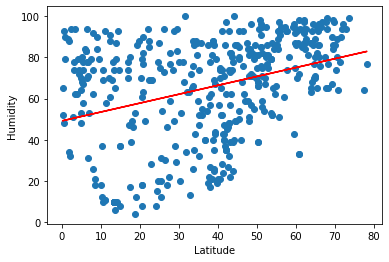

<Figure size 432x288 with 0 Axes>

In [61]:
x = northern_df['Lat']
y = northern_df['Humidity']
line_regress(x,y,'Humidity')
plt.savefig("../Images/NH_hum_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.07x + 74.65
r-squared: 0.05301304247326145


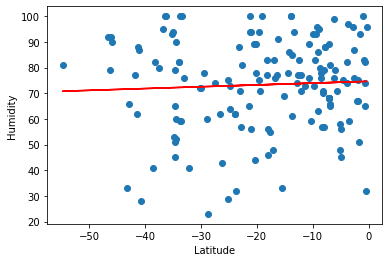

<Figure size 432x288 with 0 Axes>

In [62]:
x = southern_df['Lat']
y = southern_df['Humidity']
line_regress(x,y,'Humidity')
plt.savefig("../Images/SH_hum_vs_lat.png")

***Looking at the linear regression for each hemisphere, neither hemisphere shows a strong correlation between humidity and latitude.***

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.56x + 29.15
r-squared: 0.2853071632408498


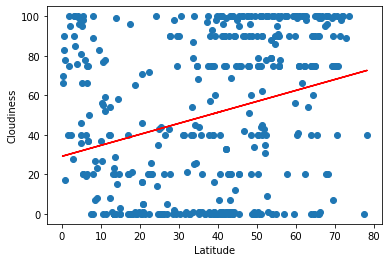

<Figure size 432x288 with 0 Axes>

In [63]:
x = northern_df['Lat']
y = northern_df['Cloudiness']
line_regress(x,y,'Cloudiness')
plt.savefig("../Images/NH_cloud_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.19x + 57.37
r-squared: 0.06870255356188003


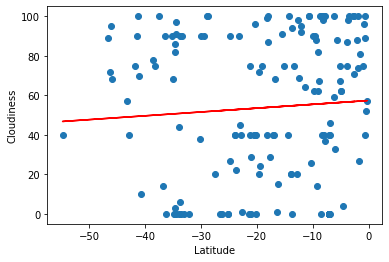

<Figure size 432x288 with 0 Axes>

In [64]:
x = southern_df['Lat']
y = southern_df['Cloudiness']
line_regress(x,y,'Cloudiness')
plt.savefig("../Images/SH_cloud_vs_lat.png")

***Looking at the linear regression for each hemisphere, neither hemisphere shows a strong correlation between cloudiness and latitude.***

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x + 7.43
r-squared: 0.1335003023443642


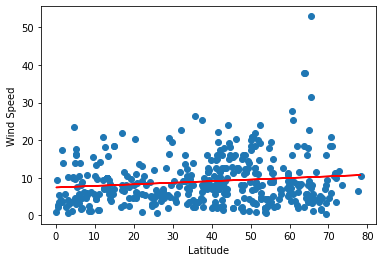

<Figure size 432x288 with 0 Axes>

In [65]:
x = northern_df['Lat']
y = northern_df['Wind Speed']
line_regress(x,y,'Wind Speed')
plt.savefig("../Images/NH_speed_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.14x + 4.13
r-squared: -0.34307995635247157


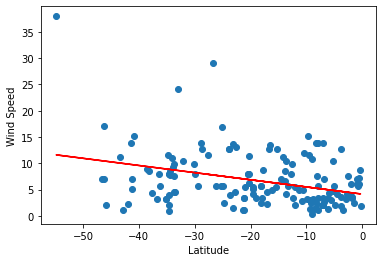

<Figure size 432x288 with 0 Axes>

In [66]:
x = southern_df['Lat']
y = southern_df['Wind Speed']
line_regress(x,y,'Wind Speed')
plt.savefig("../Images/SH_speed_vs_lat.png")

***Looking at the linear regression for each hemisphere, neither hemisphere shows a strong correlaton between wind speed and latitude.***